# EDA del data set de Condiciones climáticas

### Paso 0: Importar las librerias necesarias y cargar el dataset que será analizado:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
location_id = pd.read_csv('../assets/Datasets/raw_dataset_weather_2022_2024.csv', nrows=5)
location_id

,location_id,latitude,longitude,elevation,utc_offset_seconds,timezone,timezone_abbreviation
0,0,40.667835,-73.810210,13.0,-18000,America/New_York,EST
1,1,40.667835,-73.937680,19.0,-18000,America/New_York,EST
2,2,40.808434,-74.019900,45.0,-18000,America/New_York,EST
3,3,40.878735,-73.869140,20.0,-18000,America/New_York,EST
4,4,40.527240,-74.237274,26.0,-18000,America/New_York,EST


In [3]:
weather_df = pd.read_csv('../assets/Datasets/raw_dataset_weather_2022_2024.csv', skiprows=7)
weather_df

,location_id,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),rain (mm),snowfall (cm),weather_code (wmo code),pressure_msl (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h)
0,0,2022-01-01T00:00,8.1,100.0,8.1,6.5,0.0,0.0,3.0,1013.5,100.0,8.0,190.0,12.6
1,0,2022-01-01T01:00,7.8,100.0,7.7,6.4,0.0,0.0,3.0,1013.6,100.0,5.4,180.0,13.0
2,0,2022-01-01T02:00,8.0,100.0,7.9,6.7,0.0,0.0,3.0,1012.8,100.0,5.2,146.0,9.7
3,0,2022-01-01T03:00,8.5,99.0,8.4,7.3,0.1,0.0,51.0,1012.4,100.0,5.9,137.0,12.6
4,0,2022-01-01T04:00,9.0,99.0,8.8,7.2,0.0,0.0,3.0,1011.3,100.0,10.4,160.0,16.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131515,4,2024-12-31T19:00,9.0,81.0,5.9,6.0,0.0,0.0,3.0,1005.3,96.0,13.3,100.0,33.1
131516,4,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131517,4,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
131518,4,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Paso 1: Exploracion de los datos
* valores erróneos
* valores nulos
* valores duplicados
* valores faltantes

In [4]:
weather_df.shape

(131520, 14)

El dataset contiene inicial mente 131520 registros correspondientes a las condiciones climaticas de los 5 borough de Nueva York durante las 24 horas de cada dia durante los años 2022, 2023 y 2024

$(365\times2 + 366)\times24\times5=131250 $ (2024 fue año bisiesto)

In [5]:
weather_df.isnull().sum()

location_id                   0
time                          0
temperature_2m (°C)          20
relative_humidity_2m (%)     20
dew_point_2m (°C)            20
apparent_temperature (°C)    20
rain (mm)                    20
snowfall (cm)                20
weather_code (wmo code)      20
pressure_msl (hPa)           20
cloud_cover (%)              20
wind_speed_10m (km/h)        20
wind_direction_10m (°)       20
wind_gusts_10m (km/h)        20
dtype: int64

Se corrobora que hay 20 registros nulos en las variables de clima, los cuales revisaremos a continuacion:

In [6]:
weather_df[weather_df['rain (mm)'].isna()]

,location_id,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),rain (mm),snowfall (cm),weather_code (wmo code),pressure_msl (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h)
26300,0,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26301,0,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26302,0,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26303,0,2024-12-31T23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52604,1,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52605,1,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52606,1,2024-12-31T22:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52607,1,2024-12-31T23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78908,2,2024-12-31T20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
78909,2,2024-12-31T21:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observando a detalle los valores faltantes, lo que se encuentra es que todos aquellos valores a partir de las 20 horas del 31-12-2024, para todos los borough, no estan disponibles aun.

Estos registros seran eliminados del dataset.

In [ ]:
weather_df.dropna(inplace=True)
weather_df.shape

(131500, 14)

Ahora vemos el tamaño final del dataset (131500 registros)

In [8]:
weather_df.duplicated().sum()

0

El dataset no presenta valores duplicados.

A continuación se estudiarán las variables cuantitativas:

In [9]:
weather_df.describe()

,location_id,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),rain (mm),snowfall (cm),weather_code (wmo code),pressure_msl (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h)
count,131500.000000,131500.000000,131500.000000,131500.000000,131500.000000,131500.000000,131500.000000,131500.000000,131500.000000,131500.000000,131500.000000,131500.000000,131500.000000
mean,2.000000,12.762012,69.746601,6.827126,10.773694,0.148500,0.004058,9.412996,1016.623643,56.026753,13.409519,205.871848,26.206084
std,1.414219,9.456027,18.686963,9.849474,11.875935,0.773432,0.057446,19.367070,8.017418,43.617264,6.913551,101.715871,12.334690
min,0.000000,-17.200000,13.000000,-30.400000,-24.500000,0.000000,0.000000,0.000000,982.100000,0.000000,0.000000,0.000000,0.700000
25%,1.000000,5.300000,55.000000,-0.500000,1.200000,0.000000,0.000000,0.000000,1011.700000,4.000000,8.200000,133.000000,16.900000
50%,2.000000,12.800000,71.000000,7.600000,10.300000,0.000000,0.000000,2.000000,1016.400000,70.000000,12.300000,224.000000,24.500000
75%,3.000000,20.600000,86.000000,14.700000,20.700000,0.000000,0.000000,3.000000,1021.800000,100.000000,17.400000,291.000000,33.500000
max,4.000000,37.400000,100.000000,28.000000,40.400000,23.100000,2.870000,75.000000,1049.200000,100.000000,63.500000,360.000000,123.500000


A primera vista, los valores no parecen presentar inconsistencias o anomalías:
1. Para las temperaturas, valores negativos son realistas, en especial para los minimos que se observan.
2. Para el resto de los valores, se espera que sean como minimo 0, lo cual coincide con lo observado en la tabla.

# Paso 2: Análisis preparatorio para el proceso ETL

A continuación pasaremos a mostrar el tipo de datos de este dataset, separar las columnas por la importancia para los objetivos del proyecto y sugerencias para cambios

In [10]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131500 entries, 0 to 131515
Data columns (total 14 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   location_id                131500 non-null  int64  
 1   time                       131500 non-null  object 
 2   temperature_2m (°C)        131500 non-null  float64
 3   relative_humidity_2m (%)   131500 non-null  float64
 4   dew_point_2m (°C)          131500 non-null  float64
 5   apparent_temperature (°C)  131500 non-null  float64
 6   rain (mm)                  131500 non-null  float64
 7   snowfall (cm)              131500 non-null  float64
 8   weather_code (wmo code)    131500 non-null  float64
 9   pressure_msl (hPa)         131500 non-null  float64
 10  cloud_cover (%)            131500 non-null  float64
 11  wind_speed_10m (km/h)      131500 non-null  float64
 12  wind_direction_10m (°)     131500 non-null  float64
 13  wind_gusts_10m (km/h)      131500 

Acá se puede observar que:
1. `location_id` es un numero, que representa el borough y que se puede relacionar con la tabla instanciada en la variable con el mismo nombre.
2. `time` es un tipo `object`, el cual debe ser modificado posteriormente a `datetime`, ya que este valor sera necesario para hacer el `join` con el dataset the viajes.
3. El resto de las columnas, que representan condiciones climaticas, son valores cuantitativos de tipo `float`, por lo que no requiere transformacion, y su relevancia será determinada en la etapa de `"feature engineering"` del `Machine Learning`.
4. Se observa que no hay valores nulos (ya fueron eliminados previamente).

| Columna        |  Tipo de dato  | Detalle
| ------             |    -----  | -----  
| location_id             |    int64  | --  |
| time               |    object  | Se debe cambiar a tipo `datetime` para<br>poder trabajar con la data de viajes  |
| temperature_2m (°C)             |    float64  | --  |
| relative_humidity_2m (%)             |    float64  | --  |
| dew_point_2m (°C)             |    float64| --  |
| dew_point_2m (°C)             |    float64| --  |
| rain (mm)             |    float64  | --  |
| snowfall (cm)             |    float64  | --  |
| weather_code (wmo code)             |    float64  | --  |
| pressure_msl (hPa)             |    float64| --  |
| cloud_cover (%)             |    float64| --  |
| wind_speed_10m (km/h)             |    float64  | --  |
| wind_direction_10m (°)             |    float64 | --  |
| wind_gusts_10m (km/h)             |    float64  | --  |

### A continuación se muestra el codigo sugerido para transformar la columna `'time'` de `object` a `datetime`:

In [11]:
weather_df['time']=pd.to_datetime(weather_df['time'], format='%Y-%m-%dT%H:%M')
weather_df.head()

,location_id,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),rain (mm),snowfall (cm),weather_code (wmo code),pressure_msl (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h)
0,0,2022-01-01 00:00:00,8.1,100.0,8.1,6.5,0.0,0.0,3.0,1013.5,100.0,8.0,190.0,12.6
1,0,2022-01-01 01:00:00,7.8,100.0,7.7,6.4,0.0,0.0,3.0,1013.6,100.0,5.4,180.0,13.0
2,0,2022-01-01 02:00:00,8.0,100.0,7.9,6.7,0.0,0.0,3.0,1012.8,100.0,5.2,146.0,9.7
3,0,2022-01-01 03:00:00,8.5,99.0,8.4,7.3,0.1,0.0,51.0,1012.4,100.0,5.9,137.0,12.6
4,0,2022-01-01 04:00:00,9.0,99.0,8.8,7.2,0.0,0.0,3.0,1011.3,100.0,10.4,160.0,16.2


In [12]:
weather_df.tail()

,location_id,time,temperature_2m (°C),relative_humidity_2m (%),dew_point_2m (°C),apparent_temperature (°C),rain (mm),snowfall (cm),weather_code (wmo code),pressure_msl (hPa),cloud_cover (%),wind_speed_10m (km/h),wind_direction_10m (°),wind_gusts_10m (km/h)
131511,4,2024-12-31 15:00:00,9.4,73.0,4.8,6.2,0.0,0.0,3.0,1009.4,87.0,12.8,110.0,29.5
131512,4,2024-12-31 16:00:00,8.8,78.0,5.1,5.6,0.0,0.0,3.0,1008.8,95.0,13.4,112.0,28.4
131513,4,2024-12-31 17:00:00,8.5,81.0,5.4,5.5,0.0,0.0,3.0,1008.5,98.0,12.2,112.0,27.4
131514,4,2024-12-31 18:00:00,8.6,83.0,5.9,5.4,0.0,0.0,3.0,1007.0,100.0,14.8,106.0,28.8
131515,4,2024-12-31 19:00:00,9.0,81.0,5.9,6.0,0.0,0.0,3.0,1005.3,96.0,13.3,100.0,33.1


# Paso 3: Gráficos

A continuación pasaremos a mostrar graficamente algunas distribuciones presentes en los datos

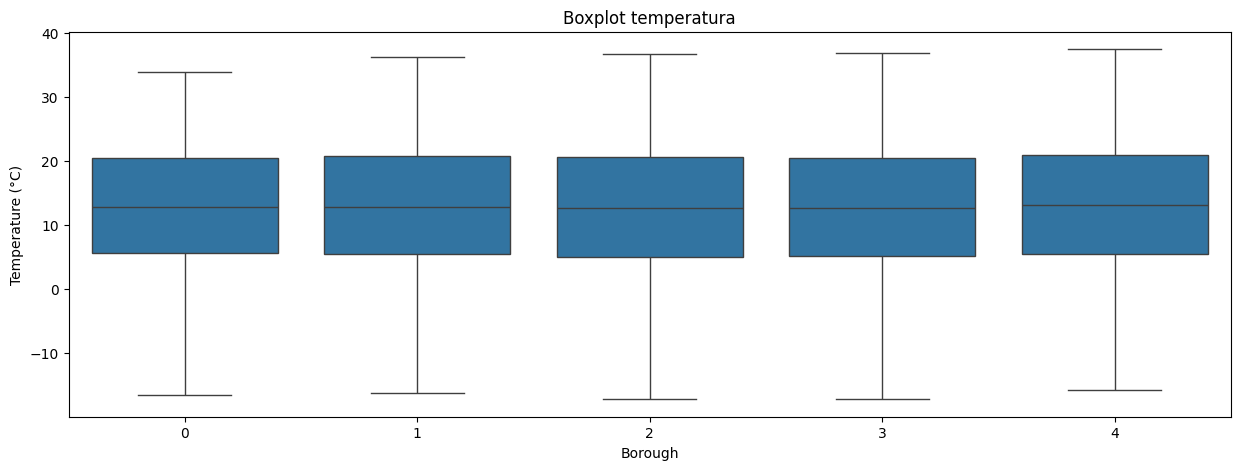

In [13]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df['temperature_2m (°C)'], orient='v')
plt.title('Boxplot temperatura') 
plt.xlabel('Borough')
plt.ylabel('Temperature (°C)')
plt.show()

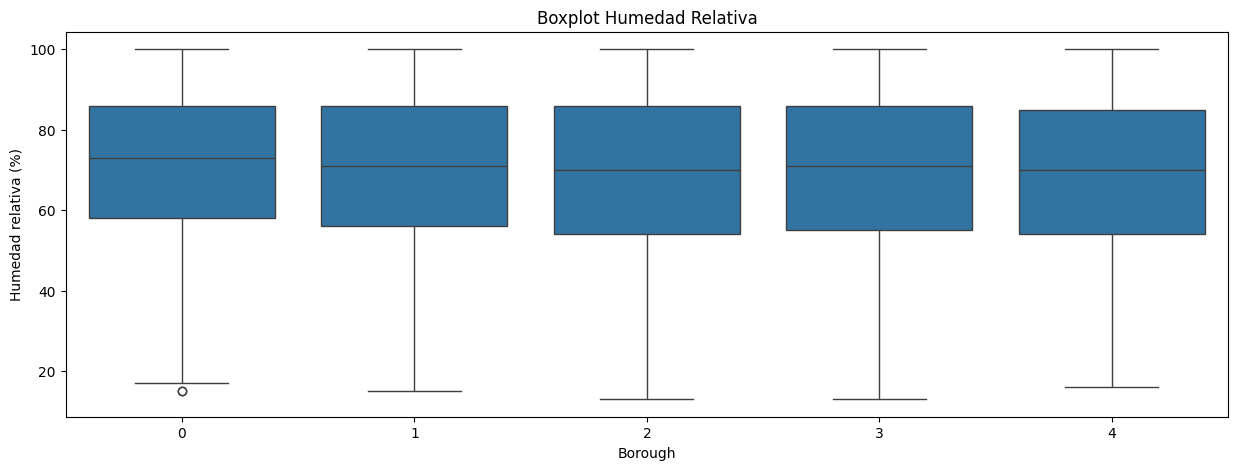

In [14]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df['relative_humidity_2m (%)'])
plt.title('Boxplot Humedad Relativa') 
plt.xlabel('Borough')
plt.ylabel('Humedad relativa (%)')
plt.show()

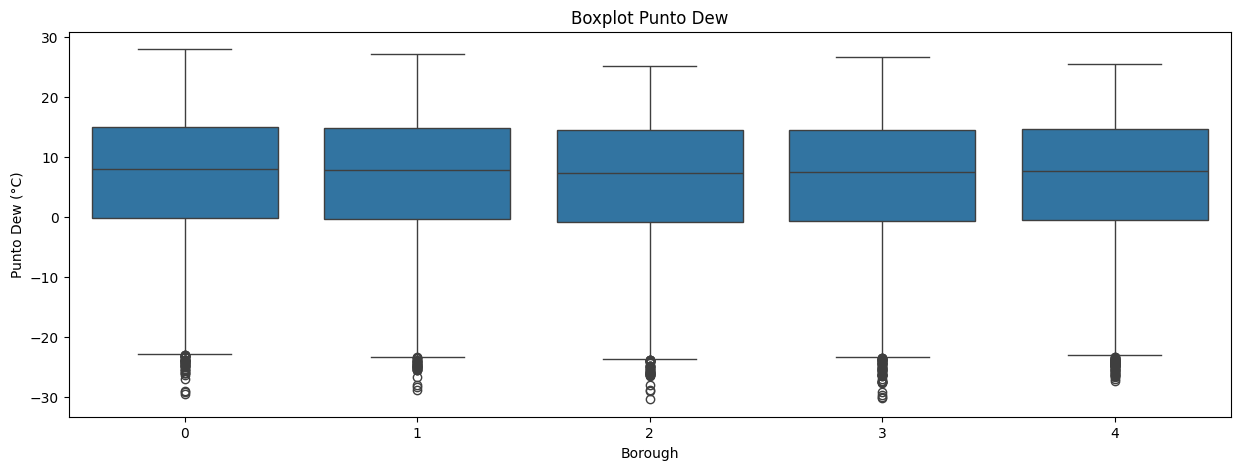

In [15]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df['dew_point_2m (°C)'])
plt.title('Boxplot Punto Dew') 
plt.xlabel('Borough')
plt.ylabel('Punto Dew (°C)')
plt.show()

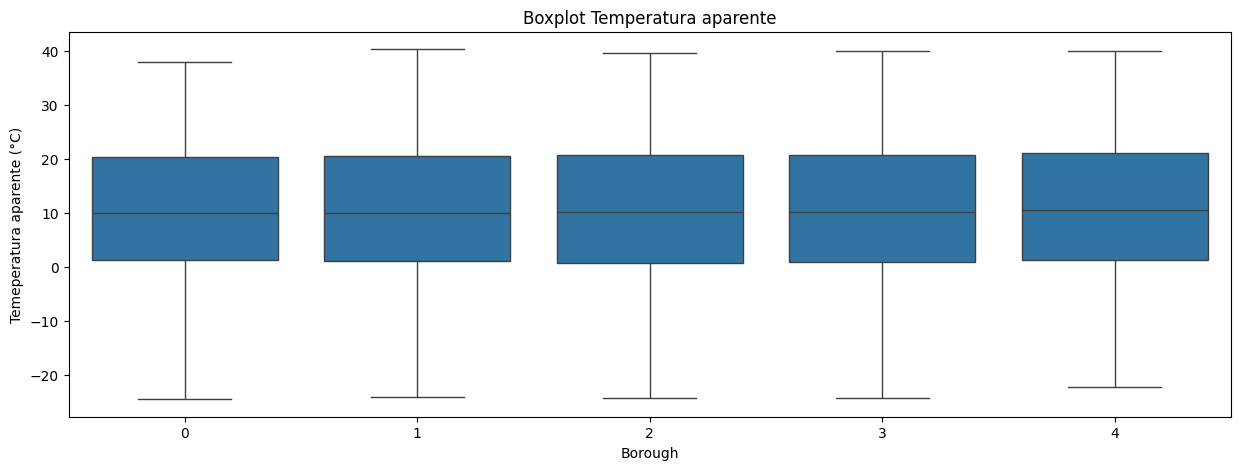

In [16]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df['apparent_temperature (°C)'])
plt.title('Boxplot Temperatura aparente') 
plt.xlabel('Borough')
plt.ylabel('Temeperatura aparente (°C)')
plt.show()

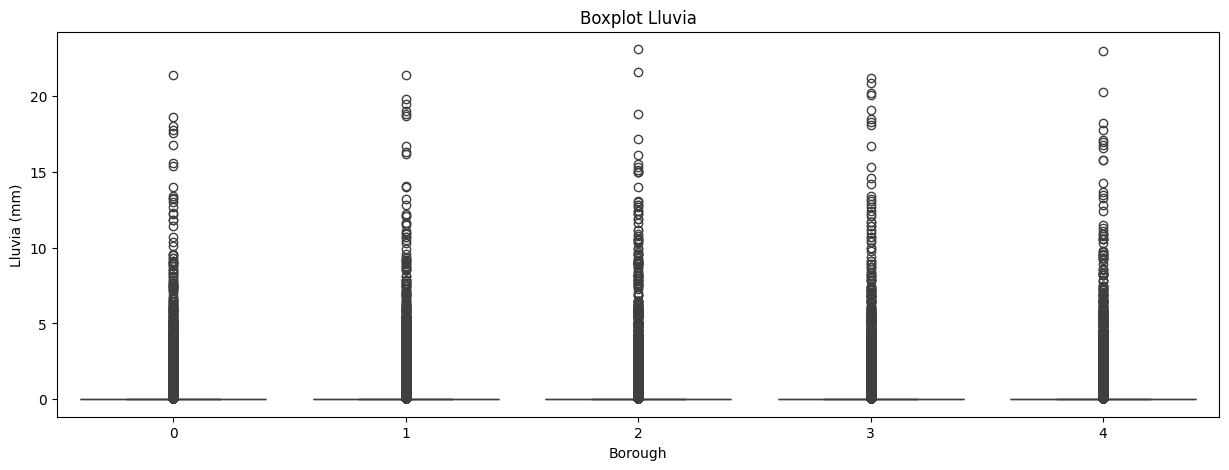

In [17]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df['rain (mm)'])
plt.title('Boxplot Lluvia') 
plt.xlabel('Borough')
plt.ylabel('Lluvia (mm)')
plt.show()

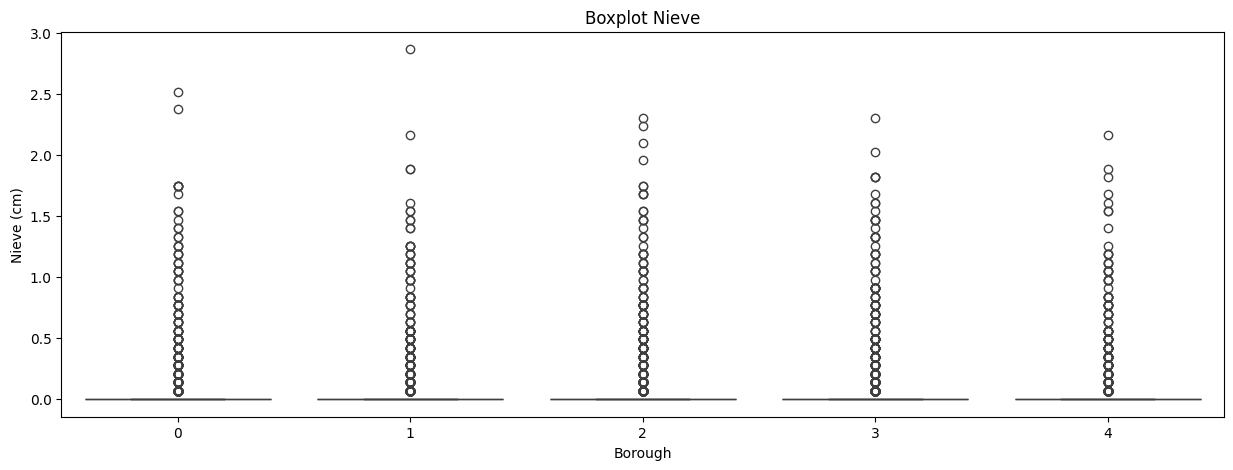

In [18]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df['snowfall (cm)'])
plt.title('Boxplot Nieve') 
plt.xlabel('Borough')
plt.ylabel('Nieve (cm)')
plt.show()

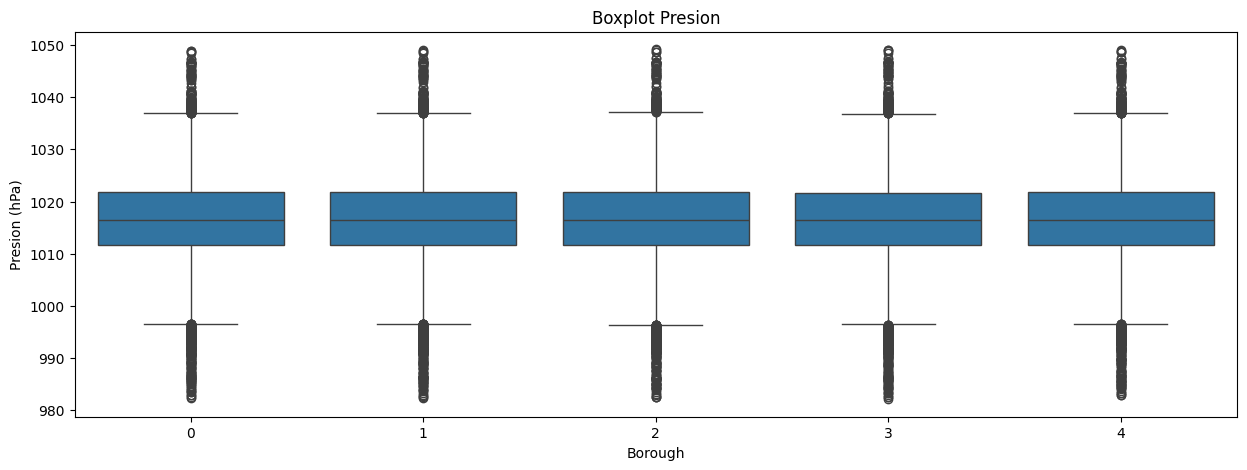

In [19]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df['pressure_msl (hPa)'])
plt.title('Boxplot Presion') 
plt.xlabel('Borough')
plt.ylabel('Presion (hPa)')
plt.show()

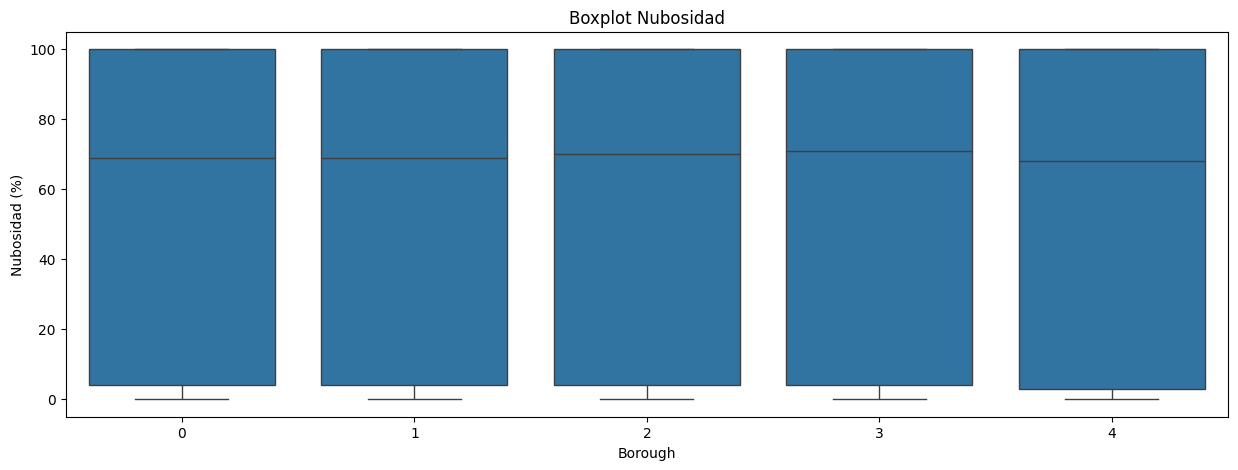

In [20]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df['cloud_cover (%)'])
plt.title('Boxplot Nubosidad') 
plt.xlabel('Borough')
plt.ylabel('Nubosidad (%)')
plt.show()

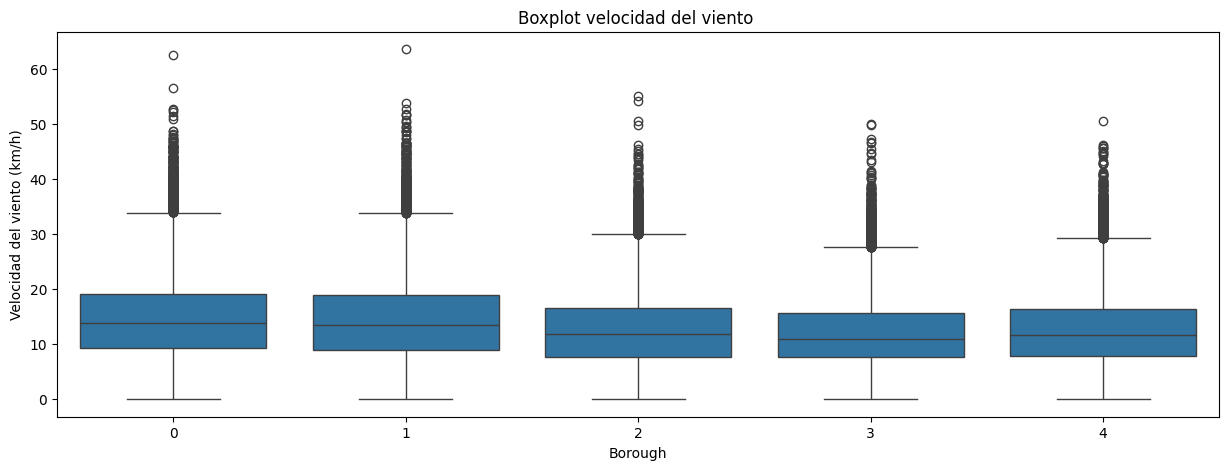

In [21]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df['wind_speed_10m (km/h)'])
plt.title('Boxplot velocidad del viento ') 
plt.xlabel('Borough')
plt.ylabel('Velocidad del viento (km/h)')
plt.show()

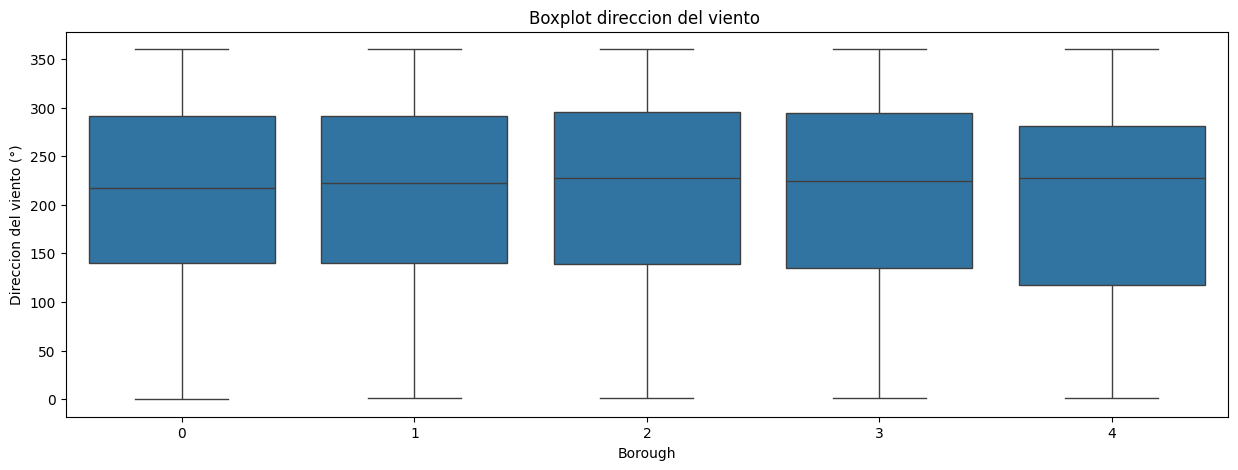

In [22]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df['wind_direction_10m (°)'])
plt.title('Boxplot direccion del viento ') 
plt.xlabel('Borough')
plt.ylabel('Direccion del viento (°)')
plt.show()

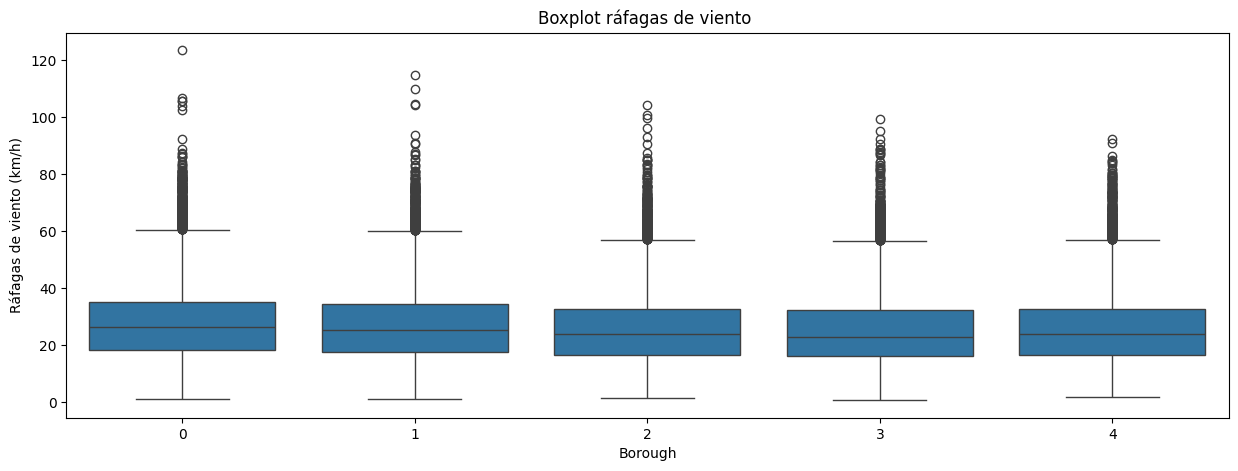

In [23]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df['wind_gusts_10m (km/h)'])
plt.title('Boxplot ráfagas de viento ') 
plt.xlabel('Borough')
plt.ylabel('Ráfagas de viento (km/h)')
plt.show()

De los boxplots realizados destacan aquellos relacionados con la lluvia y la nieve.
* Estos boxplots deben ser ajustados de acuerdo a los meses del año, ya que en gran parte del año (en especial la nieve) los valores son 0, y hay pequeñas temporadas donde si hay valores altos de acuerdo a la temporada.

A continuación se muestra esos 2 boxplots pero dejando los valores mayores a 0:

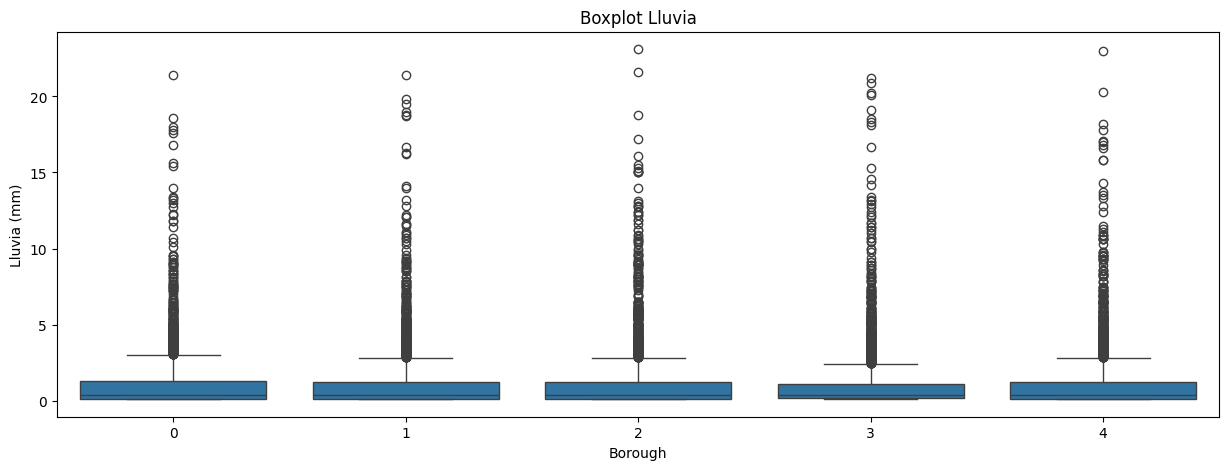

In [24]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df[weather_df['rain (mm)']>0]['rain (mm)'])
plt.title('Boxplot Lluvia') 
plt.xlabel('Borough')
plt.ylabel('Lluvia (mm)')
plt.show()

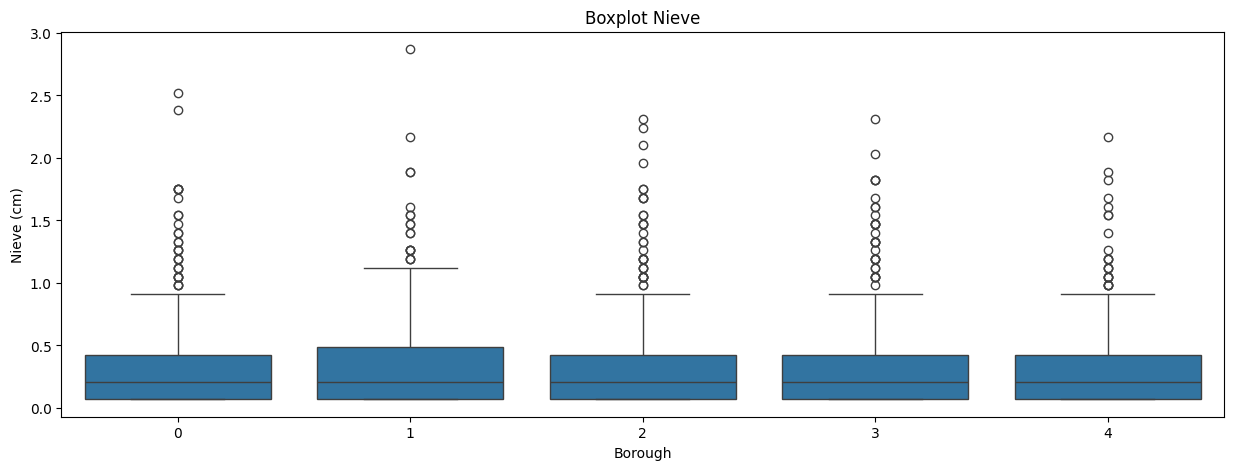

In [25]:
plt.figure(figsize = (15,5))
sns.boxplot( data=weather_df,x=weather_df['location_id'], y=weather_df[weather_df['snowfall (cm)']>0]['snowfall (cm)'])
plt.title('Boxplot Nieve') 
plt.xlabel('Borough')
plt.ylabel('Nieve (cm)')
plt.show()

En general, todos los graficos poseen comportamientos bastante similares ya que se trata de los 5 borough de la ciudad de Nueva York, los cuales estan todos proximos entre sí, por lo que es de esperarse esta similitud.